In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [12]:
path="/content/drive/MyDrive/Projects/SamsungSmartwatchActivity"
import os
os.chdir(path)

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt

In [14]:
train_data=pd.read_csv('SamsungTrain.csv')
test_data=pd.read_csv('SamsungTest.csv')

In [15]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


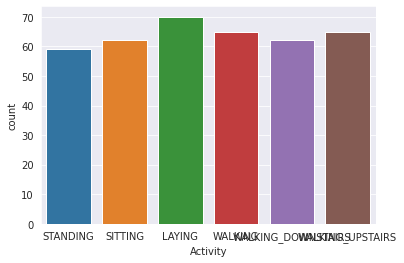

In [16]:
abc=train_data[train_data['subject']==30]['Activity']
sb.countplot(abc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

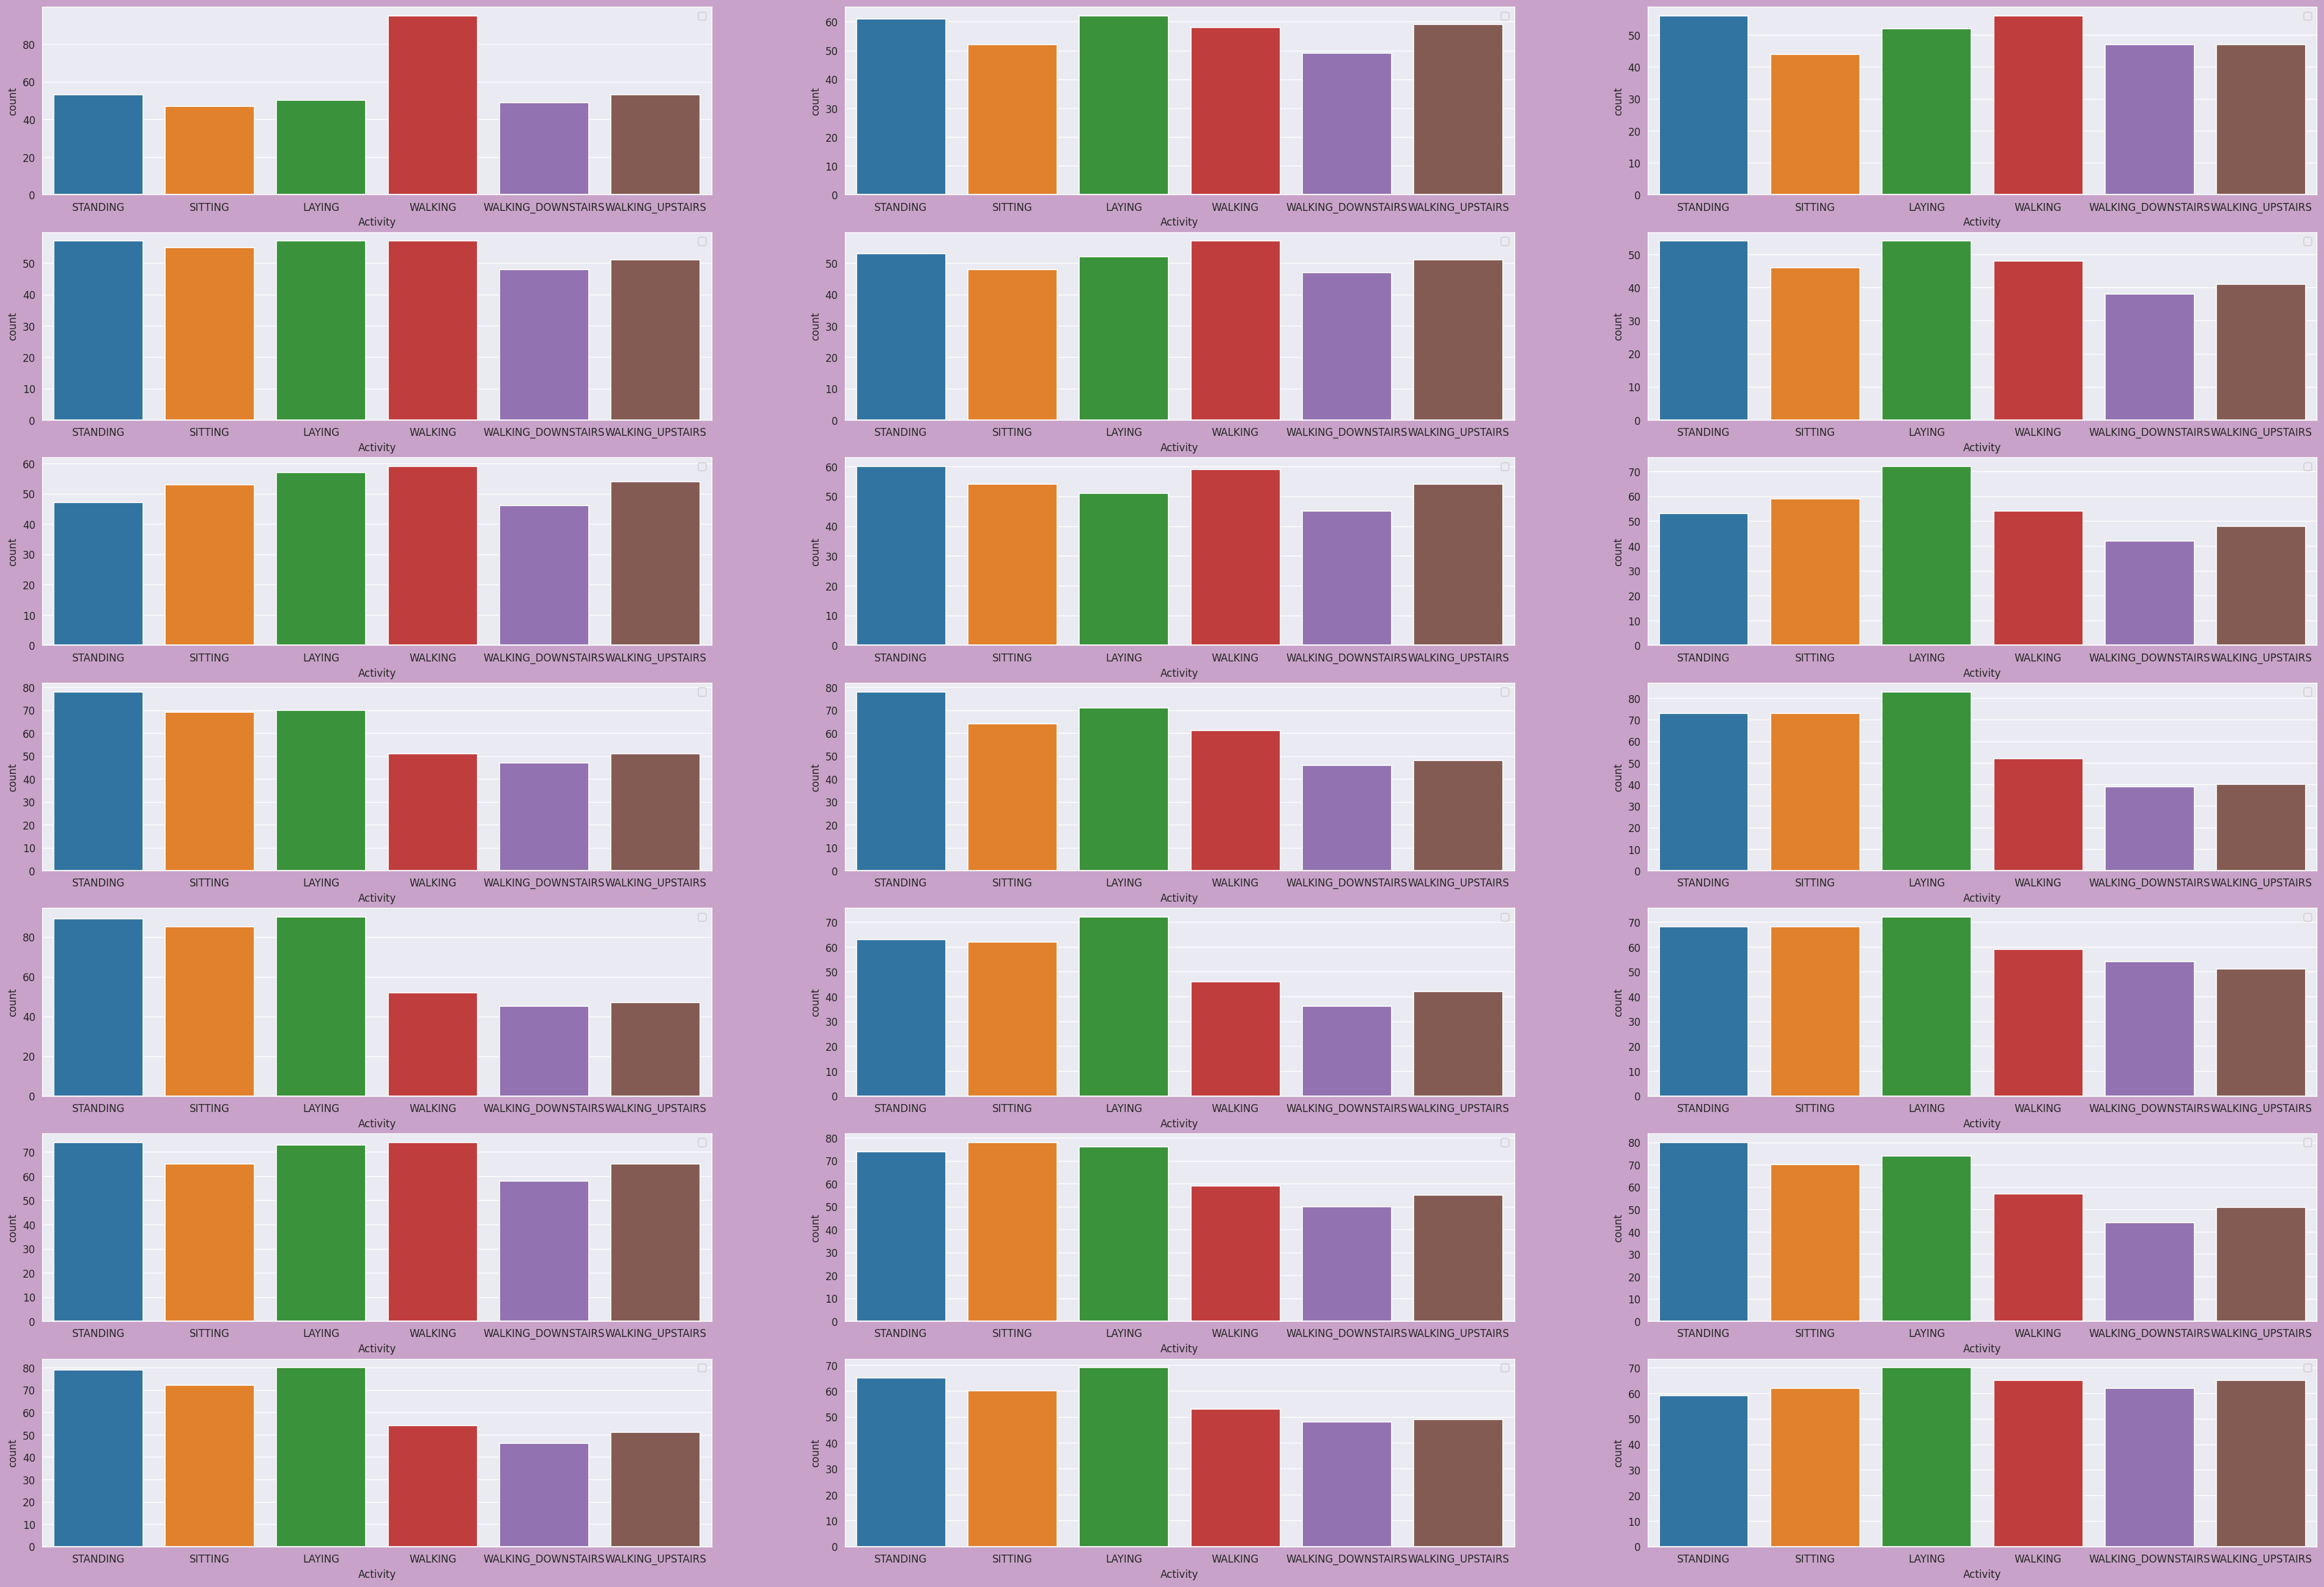

In [17]:
sb.set_style('darkgrid')
fig=plt.figure(figsize=(40,40),dpi=120,facecolor='#C8A2C8',edgecolor='black')
c=1
for i in train_data['subject'].unique():
  temp=train_data[train_data['subject']==i]['Activity']
  plt.subplot(10,3,c)
  c+=1
  sb.countplot(temp)
  plt.legend()

In [18]:
train_data['subject'].value_counts().sort_index()

1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

In [19]:
train_data[train_data['Activity']=='STANDING']

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.274527,-0.032259,-0.110678,-0.990631,-0.687065,-0.885434,-0.991251,-0.676243,-0.864352,-0.935640,...,-0.857197,-0.011990,0.215740,0.867603,-0.868352,-0.888077,0.173534,-0.000707,30,STANDING
7196,0.270246,-0.067724,-0.147258,-0.990453,-0.774064,-0.926984,-0.991050,-0.793255,-0.922003,-0.937346,...,-0.668811,-0.022586,-0.039992,0.725042,-0.744780,-0.880750,0.179059,0.001008,30,STANDING
7197,0.274422,-0.021115,-0.096432,-0.993005,-0.907217,-0.937185,-0.994032,-0.909919,-0.929252,-0.938918,...,-0.492137,0.049622,-0.053859,-0.582824,-0.655946,-0.857129,0.196654,0.009921,30,STANDING
7198,0.274834,-0.014149,-0.080437,-0.978700,-0.871865,-0.903318,-0.984797,-0.906035,-0.908251,-0.907795,...,-0.037792,0.051835,0.102538,-0.639664,-0.860865,-0.852759,0.199518,0.007930,30,STANDING


In [20]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [21]:
for i in train_data.columns:
  print(i)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

In [22]:
train_data['subject']

0        1
1        1
2        1
3        1
4        1
        ..
7347    30
7348    30
7349    30
7350    30
7351    30
Name: subject, Length: 7352, dtype: int64

In [23]:
train_data['Activity']

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [24]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


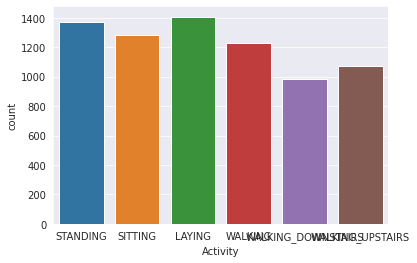

In [25]:
sb.countplot(train_data['Activity'])

In [26]:
train_data['Activity'].dtype

dtype('O')

In [27]:
train_data._get_numeric_data()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30


In [28]:
train_data._get_numeric_data().columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

1. individually count of each activity class
2. histogram
3. pie plot with percentage

In [29]:
#task 1
labels=train_data['Activity']
np.sum(labels=='STANDING')

1374

In [30]:
#task 3(i)
x=labels.value_counts()
x

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')
[1407 1374 1286 1226 1073  986]


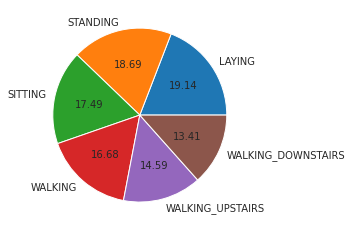

In [31]:
#task 3(ii)
x=labels.value_counts()
print(x.keys())
print(x.values)
plt.pie(x.values, labels=x.keys(),autopct='%.2f')
plt.show()

In [32]:
train_data.columns.size

563

In [33]:
train_data['subject'].value_counts().sort_index()

1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

In [34]:
labels[0]

'STANDING'

In [35]:
train_data['Activity']

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [36]:
train_data['Activity'].shape

(7352,)

In [37]:
y_train=train_data.pop('Activity')

In [38]:
y_train.shape

(7352,)

In [39]:
x_train=train_data.drop(['subject'],axis=1)

In [40]:
x_train.shape

(7352, 561)

In [41]:
y_test=test_data.pop('Activity')

In [42]:
y_test.shape

(2947,)

In [43]:
x_test=test_data.drop(['subject'],axis=1)

In [44]:
x_test.shape

(2947, 561)

LABEL ENCODING

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [47]:
y_train

array([2, 2, 2, ..., 5, 5, 5])

to balance out the distribution with mean 0 and standard_deviatioin 1

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

LOGISTIC REGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='elasticnet',solver='saga',max_iter=200,l1_ratio=0.2)

In [51]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(l1_ratio=0.2, max_iter=200, penalty='elasticnet',
                   solver='saga')

In [52]:
model.score(x_train,y_train)

0.9870783460282916

In [53]:
model.score(x_test,y_test)

0.9433322022395657

SVM

In [54]:
from sklearn.svm import SVC
model2=SVC(C=1000,kernel='rbf',gamma='scale')
#using great_search or random_search we can change the gamma parameter to increase the accuracy


In [55]:
model2.fit(x_train,y_train)


SVC(C=1000)

In [56]:
model2.score(x_train,y_train)

1.0

In [57]:
model2.score(x_test,y_test)

0.9565659993213438